In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.head())

                                              laptop status   brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...    New    Asus   
3  MSI Katana GF66 12UC-082XES Intel Core i7-1270...    New     MSI   
4  HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...    New      HP   

        model            cpu  ram  storage storage_type       gpu  screen  \
0  ExpertBook  Intel Core i5    8      512          SSD       NaN    15.6   
1          Go  Intel Celeron    8      256          SSD       NaN    15.6   
2  ExpertBook  Intel Core i3    8      256          SSD       NaN    15.6   
3      Katana  Intel Core i7   16     1000          SSD  RTX 3050    15.6   
4         15S  Intel Core i5   16      512          SSD       NaN    15.6   

  touch  final_price  
0    No      1009.00  
1    No       299.00  
2    No       789.00  
3    No      1199.

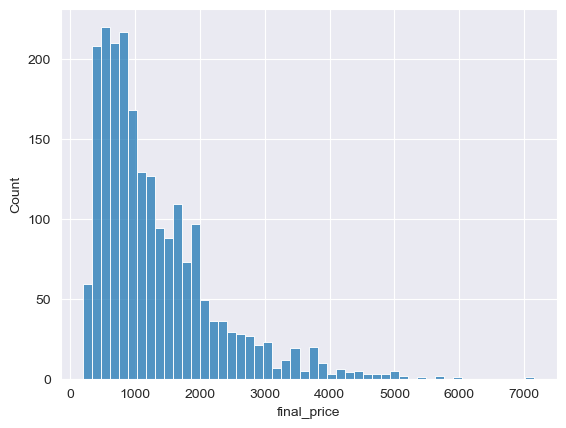

In [18]:
sns.histplot(df.final_price, bins=50)
plt.show()

In [19]:
base = ['ram', 'storage', 'screen']
df[base].isnull().sum()

ram        0
storage    0
screen     4
dtype: int64

In [20]:
df['ram'].median()

16.0

In [21]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
print(df_train[base].head())
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

      ram  storage  screen
2079   32     1000    15.6
668     4       64    14.1
2073   32     1000    14.0
1113   16      512    13.3
788    32     1000    16.0


In [22]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [23]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [24]:
def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

def prepare_X_zero(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [25]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [26]:
X_train = prepare_X_zero(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X_zero(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', round(rmse(y_val, y_pred), 2))

train 602.3920520606714
validation 597.36


In [27]:
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X_mean(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', round(rmse(y_val, y_pred), 2))

train 602.1844959403247
validation 600.26


In [28]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [29]:
X_train = prepare_X_zero(df_train)
X_val = prepare_X_zero(df_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred), 2))

     0 597.36
  0.01 597.36
   0.1 597.35
     1 597.21
     5 597.01
    10 597.06
   100 597.9


In [30]:
rmse_scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_train = prepare_X_zero(df_train)
    X_val = prepare_X_zero(df_val)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    
    rmse_score = round(rmse(y_val, y_pred), 2)
    rmse_scores.append(rmse_score)

std_rmse = np.std(rmse_scores)
std_rmse_rounded = round(std_rmse, 3)
print('std:', std_rmse_rounded)

std: 29.176


In [31]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train_val = pd.concat([df_train, df_val])

y_train_val = df_train_val.final_price.values
y_test = df_test.final_price.values

del df_train_val['final_price']
del df_test['final_price']

X_train_val = prepare_X_zero(df_train_val)
X_test = prepare_X_zero(df_test)

w_0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)
y_pred = w_0 + X_test.dot(w)
print(round(rmse(y_test, y_pred), 2))

608.61
